<a href="https://colab.research.google.com/github/hongwon2/Python-Practice/blob/main/%EC%82%AC%EA%B8%B0%EA%B5%AC%EB%A7%A4%EB%A5%BC_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 승인
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경로 설정
%cd /content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석

/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석


#새로운 사용자의 첫번째 거래가불법적일 확률을 예측하는
#기계학습 모델 구축

Electronica 전자제품 판매 사이트에서 제공된 데이터

- Fraud_Data : 유저의 첫번재 트렌젝션 정보 데이터
  - user_id : 유저 아이디
  - signup_time : 계정생성시간
  - purchase_time : 구매시간
  - device_id : 디바이스 아이디
  - source : 유저가 들어온 경로
  - browser : 유저가 사용한 브라우저
  - sex : 성별
  - age : 나이
  - ip_address : 아이피 주소
  - class : 사기 여부(사기일 경우 1, 아닐경우 0)


In [ ]:
#넘파이 ,판다스 불러오기
# 데이터 불러오기
import numpy as np
import pandas as pd
data = pd.read_csv('Fraud_Data.csv')

In [ ]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [ ]:
#클래스 확인
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

# 데이터 탐색

In [ ]:
data['p_mth'] = pd.to_datetime(data['purchase_time']).dt.month
data['s_mth'] = pd.to_datetime(data['signup_time']).dt.month

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_mth, dtype: object

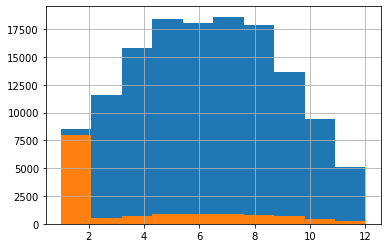

In [ ]:
#구매시간 히스토그램
data.groupby('class').p_mth.hist()
#사기 구매일 경우 가입 하자마자 구매 한 경우가 많음

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: s_mth, dtype: object

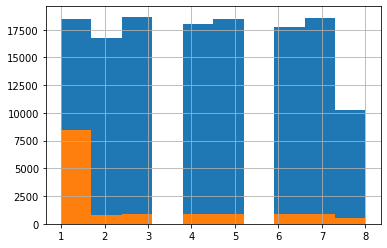

In [ ]:
#가입시간 히스토그램
data.groupby('class').s_mth.hist()
#1월 가입 자 중 사기꾼이 많음

In [ ]:
#구매시간과 가입시간 추출
data['s_hour']=pd.to_datetime(data['signup_time']).dt.hour
data['p_hour']=pd.to_datetime(data['purchase_time']).dt.hour

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_hour, dtype: object

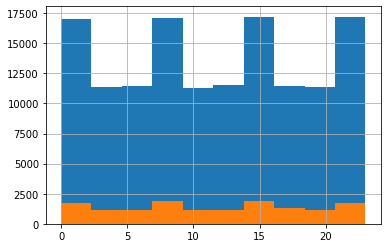

In [ ]:
#구매시간 히스토그램
data.groupby(['class']).p_hour.hist()

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: s_hour, dtype: object

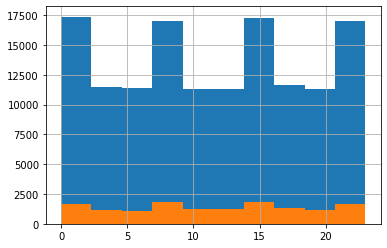

In [ ]:
#가입시간 히스토그램
data.groupby(['class']).s_hour.hist()

In [ ]:
#구매시간과 등록 시간의 차
data['dth'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype('timedelta64[h]')

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: dth, dtype: object

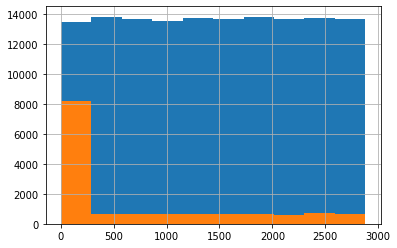

In [ ]:
#차이가 250 시간 이하 일 경우 사기꾼일 확률이 높음
data.groupby(['class']).dth.hist()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


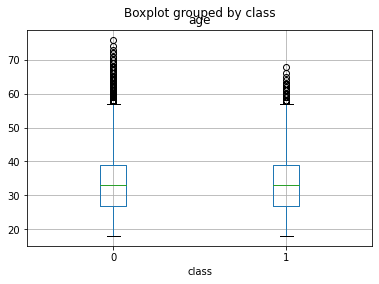

In [ ]:
#나이
data.boxplot(by = 'class',column = ['age'],grid = True)

In [ ]:
#접속경로+브라우저
s_b = []
for i in range(len(data)):
  if (data.loc[i,'source'] == 'SEO') & (data.loc[i,'browser'] == 'Chrome'):
    s_b.append('S_C')
  if (data.loc[i,'source'] == 'SEO') & (data.loc[i,'browser'] == 'Opera'):
    s_b.append('S_O')
  if (data.loc[i,'source'] == 'SEO') & (data.loc[i,'browser'] == 'Safari'):
    s_b.append('S_S')
  if (data.loc[i,'source'] == 'SEO') & (data.loc[i,'browser'] == 'IE'):
    s_b.append('S_I')
  if (data.loc[i,'source'] == 'SEO') & (data.loc[i,'browser'] == 'FireFox'):
    s_b.append('S_F')
  if (data.loc[i,'source'] == 'Direct') & (data.loc[i,'browser'] == 'Chrome'):
    s_b.append('D_C')
  if (data.loc[i,'source'] == 'Direct') & (data.loc[i,'browser'] == 'Opera'):
    s_b.append('D_O')
  if (data.loc[i,'source'] == 'Direct') & (data.loc[i,'browser'] == 'Safari'):
    s_b.append('D_S')
  if (data.loc[i,'source'] == 'Direct') & (data.loc[i,'browser'] == 'IE'):
    s_b.append('D_I')
  if (data.loc[i,'source'] == 'Direct') & (data.loc[i,'browser'] == 'FireFox'):
    s_b.append('D_F') 
  if (data.loc[i,'source'] == 'Ads') & (data.loc[i,'browser'] == 'Chrome'):
    s_b.append('A_C')
  if (data.loc[i,'source'] == 'Ads') & (data.loc[i,'browser'] == 'Opera'):
    s_b.append('A_O')
  if (data.loc[i,'source'] == 'Ads') & (data.loc[i,'browser'] == 'Safari'):
    s_b.append('A_S')
  if (data.loc[i,'source'] == 'Ads') & (data.loc[i,'browser'] == 'IE'):
    s_b.append('A_I')
  if (data.loc[i,'source'] == 'Ads') & (data.loc[i,'browser'] == 'FireFox'):
    s_b.append('A_F')
data['S_B'] = s_b

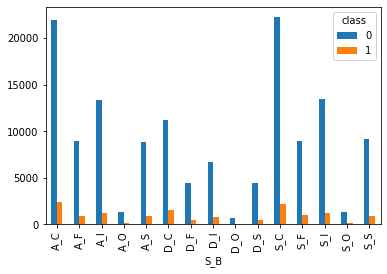

In [ ]:
# 접속경로 + 브라우저 별 클래스
data.groupby(['S_B','class']).size().unstack().plot(kind = 'bar')

In [ ]:
#성별 나이대
s_a = []
for i in range(len(data)):
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 10) & (data.loc[i,'age'] < 20) :
    s_a.append('M_10')
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 20) & (data.loc[i,'age'] < 30) :
    s_a.append('M_20')
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 30) & (data.loc[i,'age'] < 40) :
    s_a.append('M_30')
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 40) & (data.loc[i,'age'] < 50) :
    s_a.append('M_40')
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 50) & (data.loc[i,'age'] < 60) :
    s_a.append('M_50')
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 60) & (data.loc[i,'age'] < 70) :
    s_a.append('M_60')
  if (data.loc[i,'sex'] == 'M') & (data.loc[i,'age'] >= 70) & (data.loc[i,'age'] < 80) :
    s_a.append('M_70')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 10) & (data.loc[i,'age'] < 20) :
    s_a.append('F_10')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 20) & (data.loc[i,'age'] < 30) :
    s_a.append('F_20')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 30) & (data.loc[i,'age'] < 40) :
    s_a.append('F_30')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 40) & (data.loc[i,'age'] < 50) :
    s_a.append('F_40')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 50) & (data.loc[i,'age'] < 60) :
    s_a.append('F_50')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 60) & (data.loc[i,'age'] < 70) :
    s_a.append('F_60')
  if (data.loc[i,'sex'] == 'F') & (data.loc[i,'age'] >= 70) & (data.loc[i,'age'] < 80) :
    s_a.append('F_70')
data['S_A'] = s_a

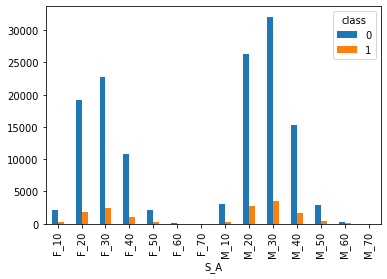

In [ ]:
#성별 연령대의 클래스 차이
data.groupby(['S_A','class']).size().unstack().plot(kind = 'bar')

In [ ]:
#디바이스 아이디 별 유저아이디 count
device_count=data[['user_id','device_id']].groupby('device_id').count().reset_index()
device_count = device_count.rename(columns = {'user_id':'d_ct'})
data = data.merge(device_count,how = 'left',on = 'device_id')

In [ ]:
#디바이스 아이디 # ex)20명이 동일한 아이패드7세대(kipfscnugoldp)를 이용해 구매함 
data[['user_id','device_id']].groupby('device_id').count().sort_values(by = 'user_id',ascending = False)

,user_id
device_id,
KIPFSCNUGOLDP,20
NGQCKIADMZORL,20
CQTUVBYIWWWBC,20
ITUMJCKWEYNDD,20
EQYVNEGOFLAWK,20
...,...
IXVBQLPWSAIDA,1
IXUYCZZVDXGPO,1
IXUWTGATQJEVG,1


In [ ]:
# 동일한 디바이스 아이디로 구매 한 경우 사기 구매가 많았음
t1 = data.groupby(['class','d_ct']).size().to_frame('size').reset_index().sort_values(['class','d_ct'],ascending = False)
t1.pivot_table(index = 'd_ct',columns = 'class',values = 'size').sort_values(('d_ct'),ascending = False)

class,0,1
d_ct,,
20,6,114
19,5,90
18,11,169
17,14,207
16,38,538
15,47,568
14,58,740
13,65,767
12,88,992


In [ ]:
#ip 별 유저아이디 count
ip_count = data[['user_id','ip_address']].groupby('ip_address').count().reset_index()
ip_count = ip_count.rename(columns = {'user_id':'ip_ct'})
data = data.merge(ip_count,how = 'left',on = 'ip_address')

In [ ]:
#유저아이디 # ex)20명이 동일한 ip주소(1.502818e+09)를 이용해 구매함
data[['user_id','ip_address']].groupby('ip_address').count().sort_values(by = 'user_id',ascending = False)

,user_id
ip_address,
1.502818e+09,20
5.760609e+08,20
3.874758e+09,20
2.050964e+09,20
2.937899e+09,19
...,...
1.427304e+09,1
1.427303e+09,1
1.427285e+09,1


In [ ]:
# 동일한 ip 주소로 접속 한 경우 사기 구매가 많았음
t2 = data.groupby(['class','ip_ct']).size().to_frame('size').reset_index().sort_values(['class','ip_ct'],ascending = False)
t2.pivot_table(index = 'ip_ct',columns = 'class',values = 'size').sort_values(('ip_ct'),ascending = False) 

class,0,1
ip_ct,,
20,4,76
19,6,127
18,9,153
17,12,192
16,35,541
15,36,504
14,56,770
13,60,772
12,87,1005


In [ ]:
pd.set_option('max_columns',30)
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_hour,p_hour,dth,S_B,S_A,d_ct,ip_ct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,22,2,1251.0,S_C,M_30,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,20,1,4.0,A_C,F_50,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,18,18,0.0,S_O,M_50,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,21,13,136.0,S_S,M_40,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,7,18,1211.0,A_S,M_40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,3,1,3,0,1461.0,S_C,M_20,2,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,5,5,17,12,258.0,S_S,M_30,1,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,5,3,23,7,1856.0,S_I,F_20,1,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,9,7,20,9,1429.0,S_C,M_30,2,1


#모델링

In [ ]:
# 분석할 피쳐 설정
df = data[['purchase_value','p_mth','s_mth','s_hour',	'p_hour',	'dth',	'S_B',	'S_A',	'ip_ct'	,'d_ct','s_mth','class']]

In [ ]:
#csv 파일 생성
path = '/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석/output.csv'

with open(path,'w',encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#파이캐럿 설치
!pip install pycaret -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#분석할 데이터 불러오기
result = pd.read_csv('output.csv')

In [ ]:
result.head()

,Unnamed: 0,purchase_value,p_mth,s_mth,s_hour,p_hour,dth,S_B,S_A,ip_ct,d_ct,s_mth.1,class
0,0,34,4,2,22,2,1251.0,S_C,M_30,1,1,2,0
1,1,16,6,6,20,1,4.0,A_C,F_50,1,1,6,0
2,2,15,1,1,18,18,0.0,S_O,M_50,12,12,1,1
3,3,44,5,4,21,13,136.0,S_S,M_40,1,1,4,0
4,4,39,9,7,7,18,1211.0,A_S,M_40,1,1,7,0


In [ ]:
result=result.drop('Unnamed: 0',axis = 1)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   purchase_value  151112 non-null  int64  
 1   p_mth           151112 non-null  int64  
 2   s_mth           151112 non-null  int64  
 3   s_hour          151112 non-null  int64  
 4   p_hour          151112 non-null  int64  
 5   dth             151112 non-null  float64
 6   S_B             151112 non-null  object 
 7   S_A             151112 non-null  object 
 8   ip_ct           151112 non-null  int64  
 9   d_ct            151112 non-null  int64  
 10  s_mth.1         151112 non-null  int64  
 11  class           151112 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 13.8+ MB


In [ ]:
#분석 세팅
exp = setup(result,silent=True,target = 'class')
#Transformed Train Set	(105778, 92)
#Transformed Test Set	(45334, 92)
#StratifiedKFold
#Fold Number	10

,Description,Value
0,session_id,6433
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(151112, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#모델 비교
model = compare_models(sort='Accuracy')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9564,0.8473,0.5380,0.9989,0.6993,0.6781,0.7160,21.878
lightgbm,Light Gradient Boosting Machine,0.9563,0.8464,0.5396,0.9936,0.6992,0.6779,0.7149,1.065
ada,Ada Boost Classifier,0.9562,0.8463,0.5381,0.9948,0.6984,0.6770,0.7144,5.437
rf,Random Forest Classifier,0.9560,0.8433,0.5412,0.9858,0.6986,0.6771,0.7127,16.921
knn,K Neighbors Classifier,0.9551,0.7689,0.5387,0.9721,0.6932,0.6711,0.7053,3.747
et,Extra Trees Classifier,0.9524,0.8375,0.5544,0.9021,0.6867,0.6625,0.6856,20.933
lr,Logistic Regression,0.9523,0.8412,0.5426,0.9167,0.6815,0.6576,0.6841,8.439
ridge,Ridge Classifier,0.9518,0.0000,0.5402,0.9122,0.6784,0.6542,0.6806,0.190
svm,SVM - Linear Kernel,0.9511,0.0000,0.5375,0.9116,0.6742,0.6497,0.6774,11.016
lda,Linear Discriminant Analysis,0.9511,0.8410,0.5426,0.8979,0.6763,0.6516,0.6759,2.732


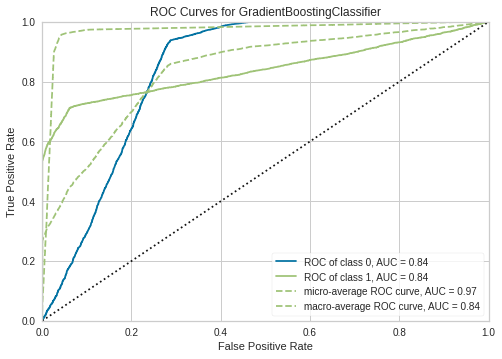

In [ ]:
plot_model(model)

# 오분류 비용를 고려한 모델 

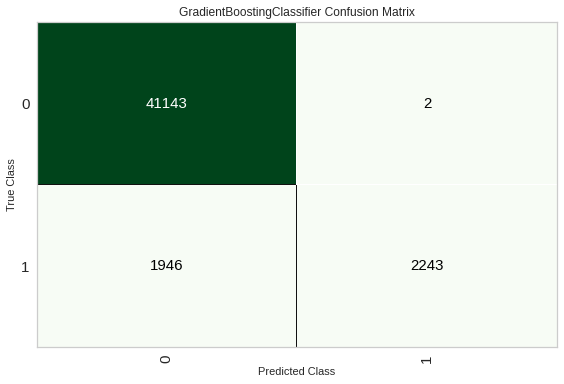

In [ ]:
#기존 모델의 컨퓨전 매트릭스
plot_model(model, plot = 'confusion_matrix')

In [ ]:
# create a custom function
def calculate_profit(y, y_pred):
  fp = np.where((y_pred==1) & (y==0), -8, 0)
  fn = np.where((y_pred==0) & (y==1), -36.99, 0)
  return np.sum([fp,fn])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f0b64107e60>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [ ]:
#오분류비용을 기준으로 상위 3가지 모델을 선택
top3 = compare_models(sort='Profit',n_select = 3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
et,Extra Trees Classifier,0.9524,0.8375,0.5544,0.9021,0.6867,0.6625,0.6856,-16899.861,20.969
rf,Random Forest Classifier,0.9560,0.8433,0.5412,0.9858,0.6986,0.6771,0.7127,-16970.529,16.900
lightgbm,Light Gradient Boosting Machine,0.9563,0.8464,0.5396,0.9936,0.6992,0.6779,0.7149,-16995.313,1.023
gbc,Gradient Boosting Classifier,0.9564,0.8473,0.5380,0.9989,0.6993,0.6781,0.7160,-17027.598,21.406
ada,Ada Boost Classifier,0.9562,0.8463,0.5381,0.9948,0.6984,0.6770,0.7144,-17041.499,5.208
knn,K Neighbors Classifier,0.9551,0.7689,0.5387,0.9721,0.6932,0.6711,0.7053,-17120.105,4.220
lr,Logistic Regression,0.9523,0.8412,0.5426,0.9167,0.6815,0.6576,0.6841,-17250.743,6.734
nb,Naive Bayes,0.9501,0.8322,0.5458,0.8791,0.6733,0.6479,0.6696,-17338.775,0.185
lda,Linear Discriminant Analysis,0.9511,0.8410,0.5426,0.8979,0.6763,0.6516,0.6759,-17349.143,2.815
ridge,Ridge Classifier,0.9518,0.0000,0.5402,0.9122,0.6784,0.6542,0.6806,-17361.119,0.201


In [ ]:
#모델 튜닝
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
Fold,,,,,,,,
0,0.9567,0.8468,0.5402,1.0,0.7014,0.6803,0.7180,-16941.4200
1,0.9561,0.8418,0.5341,1.0,0.6963,0.6750,0.7138,-17163.3600
2,0.9576,0.8523,0.5492,1.0,0.7090,0.6882,0.7243,-16608.5100
3,0.9542,0.8452,0.5141,1.0,0.6790,0.6571,0.6995,-17903.1600
4,0.9577,0.8473,0.5512,1.0,0.7107,0.6899,0.7257,-16534.5300
5,0.9558,0.8417,0.5301,1.0,0.6929,0.6715,0.7109,-17311.3200
6,0.9570,0.8537,0.5436,1.0,0.7044,0.6833,0.7204,-16830.4500
7,0.9556,0.8402,0.5286,1.0,0.6916,0.6701,0.7098,-17385.3000
8,0.9577,0.8510,0.5512,1.0,0.7107,0.6899,0.7257,-16534.5300


In [ ]:
#블랜딩 기법
#블랜딩 기법을 통해 위 3개의 모델을 합친 모델 생성
blender_top3 = blend_models(estimator_list=tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
Fold,,,,,,,,
0,0.9567,0.8399,0.5402,1.0,0.7014,0.6803,0.7180,-16941.4200
1,0.9561,0.8435,0.5341,1.0,0.6963,0.6750,0.7138,-17163.3600
2,0.9575,0.8490,0.5482,1.0,0.7082,0.6873,0.7236,-16645.5000
3,0.9542,0.8412,0.5141,1.0,0.6790,0.6571,0.6995,-17903.1600
4,0.9577,0.8396,0.5512,1.0,0.7107,0.6899,0.7257,-16534.5300
5,0.9558,0.8473,0.5301,1.0,0.6929,0.6715,0.7109,-17311.3200
6,0.9570,0.8461,0.5436,1.0,0.7044,0.6833,0.7204,-16830.4500
7,0.9556,0.8455,0.5286,1.0,0.6916,0.6701,0.7098,-17385.3000
8,0.9577,0.8519,0.5512,1.0,0.7107,0.6899,0.7257,-16534.5300


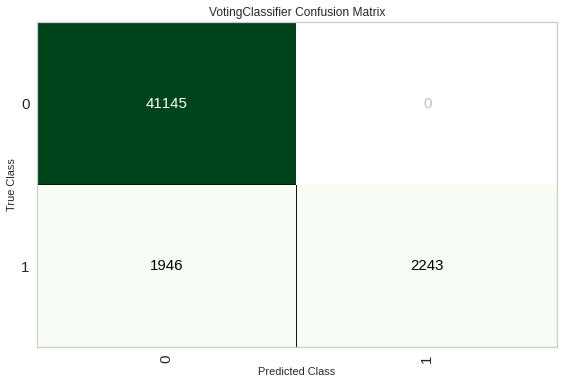

In [ ]:
#오분류 비용 고려 및 블랜딩 기법을 사용한 정확도 개선 모델
plot_model(blender_top3, plot = 'confusion_matrix')

In [ ]:
blender_top3

VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight={},
                                                   criterion='entropy',
                                                   max_depth=9,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.01,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=6,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                  